<b> Clustering Analysis

In [3]:
from clustering_functions import *
from sklearn.metrics import silhouette_score
from pre_processing_functions import preprocess
from pre_processing_functions import preprocess_semscalling
import matplotlib.pyplot as plt
import seaborn as sns
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [5]:
df= clustering('customer_info.csv')

 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 2.1962801913295817


In [6]:
df

,customer_id,customer_name,customer_gender,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,lifetime_spend_nonalcohol_drinks,lifetime_spend_alcohol_drinks,lifetime_spend_meat,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_spend_petfood,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude,customer_age,years_active,customer_educlevel,som_cluster,Kmeans_cluster,hierarchical_cluster
0,0.857433,April Clark,1.005802,0.630498,1.397496,0.222470,0.696974,-0.746485,0.522647,-0.041676,-0.020749,1.722306,0.645623,1.283549,1.653328,-0.528767,0.045856,0.731036,2.001266,-0.592996,0.723919,-1.473453,-1.210310,1.280858,-0.070294,-0.723919,None,"(1, 0)",6,0
1,-1.143473,Paul Ketchum,-0.994231,-0.905273,0.068770,-1.091753,0.696974,-0.702608,-1.013591,0.175439,0.077044,-1.336103,-1.247725,-0.322975,-0.737103,-0.659575,-1.005829,-0.613579,-0.703009,2.884929,-0.331683,0.678678,-0.613011,-0.272739,1.494428,0.331683,Bsc.,"(1, 2)",1,4
2,1.681529,Mary Downing,1.005802,0.630498,2.726221,-1.091753,2.650070,-0.349564,0.156665,0.175439,1.252036,1.786319,1.770706,0.768037,1.772232,0.432567,-0.194440,-0.839900,1.422396,-0.778881,-0.753924,-1.473453,1.823423,0.400078,-1.020305,0.753924,None,"(1, 0)",5,0
3,0.132703,Manuel Kueny,-0.994231,-0.905273,-1.259955,0.222470,-1.256123,-0.459509,3.493829,0.175439,-1.054979,-0.742202,1.741682,0.048194,-0.059196,-1.189035,0.879090,-0.320693,0.575690,-0.263788,-1.176165,-1.473453,-0.281021,-0.116035,-0.293826,1.176165,None,"(0, 1)",0,8
4,-0.312366,Curtis Tharp,-0.994231,-0.137388,0.068770,0.222470,1.348006,1.359034,-0.140867,0.175439,-0.714187,0.883022,-0.491410,0.130676,1.032558,0.694183,-0.890362,-1.159413,0.774406,-0.075508,-0.542804,0.678678,1.767444,0.312405,0.265003,0.542804,Phd.,"(1, 1)",3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34055,1.475526,Mary Diaz,1.005802,-0.137388,0.068770,-1.091753,-0.605091,2.022820,0.425769,0.609668,0.108160,0.178877,1.176580,-0.424203,1.333678,0.698335,-0.057128,-0.400571,0.074578,-0.581315,0.723919,-1.473453,0.136872,2.169138,-1.579134,-0.723919,None,"(0, 0)",2,1
34056,0.640352,John Gross,-0.994231,-0.137388,0.068770,-1.091753,0.045942,-0.325239,0.024460,-0.041676,-0.352651,0.961260,-0.240443,0.537462,-0.394289,0.492780,-0.419132,0.005476,1.940787,0.888538,0.935039,0.678678,-0.132179,-0.503135,-0.740890,-0.935039,None,"(1, 1)",3,3
34057,1.689232,Kathleen Harper,1.005802,-0.137388,-1.259955,0.222470,-0.605091,-0.399027,1.401167,0.826783,-0.500821,-0.767096,-0.598967,-0.757880,1.001673,-0.713559,1.269181,-1.385734,0.636169,0.632977,0.723919,-1.473453,0.927389,-0.633962,-1.635017,-0.723919,None,"(0, 1)",0,8
34058,-0.143409,Jenny Landry,1.005802,-0.137388,0.068770,0.222470,0.696974,0.758270,0.274519,-0.910135,-0.807534,0.025956,-0.540921,0.595574,0.124564,0.781388,0.011528,0.384897,-0.029100,0.305715,0.090558,0.678678,-0.715458,0.028906,0.544418,-0.090558,Msc.,"(1, 1)",3,3


Text(0.5, 1.0, 'K-means Clustering')

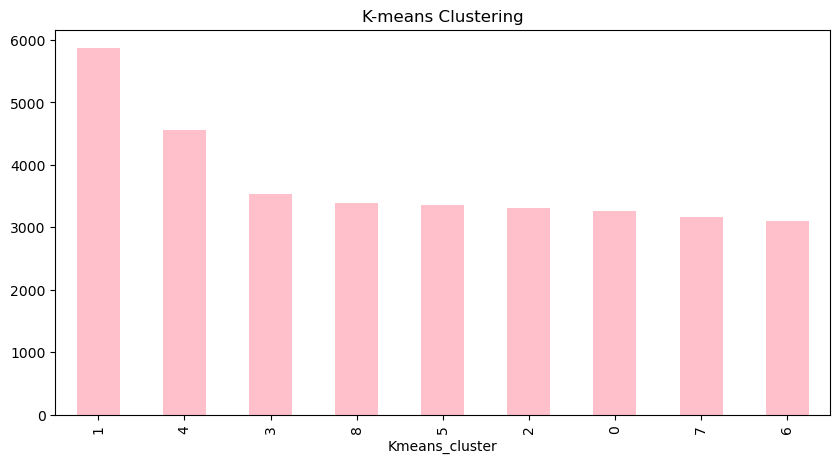

In [7]:
df['Kmeans_cluster'].value_counts().plot(kind='bar', figsize=(10, 5), color='pink')
plt.title('K-means Clustering')

Text(0.5, 1.0, 'Hierarchical Clustering')

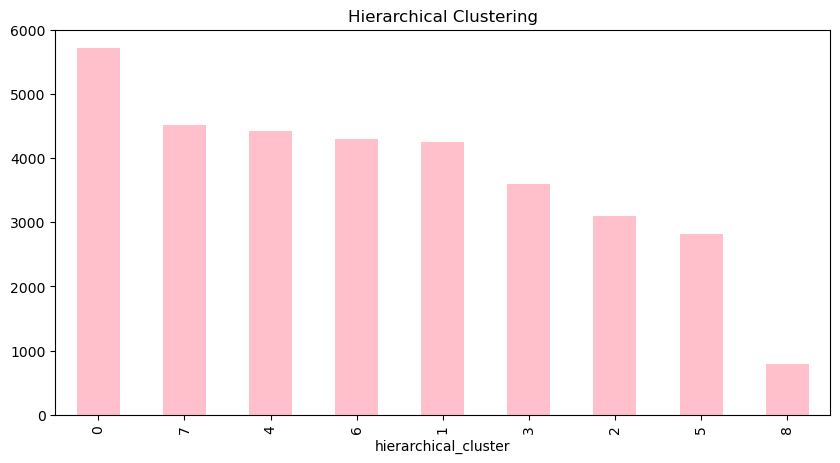

In [8]:
df['hierarchical_cluster'].value_counts().plot(kind='bar', figsize=(10, 5), color='pink')
plt.title('Hierarchical Clustering')

Text(0.5, 1.0, 'Self Organizing Map Clustering')

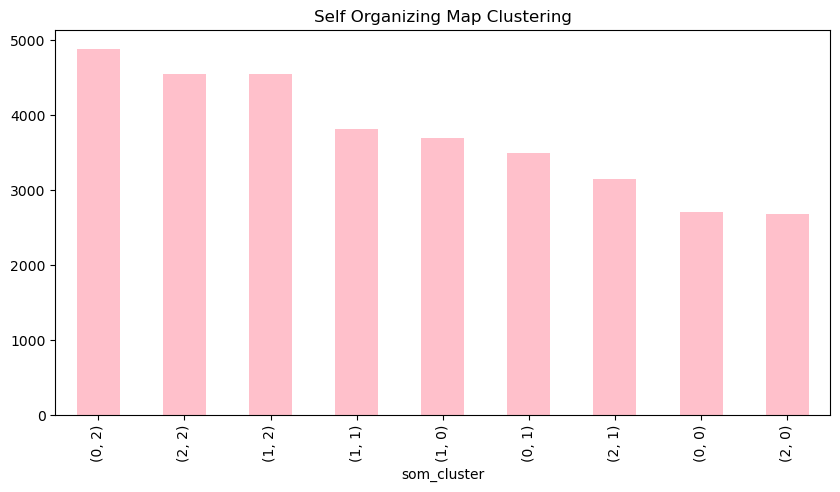

In [9]:
df['som_cluster'].value_counts().plot(kind='bar', figsize=(10, 5), color='pink')
plt.title('Self Organizing Map Clustering')

In [10]:
data = preprocess_semscalling('customer_info.csv')
data['kmeans_cluster'] = df['Kmeans_cluster']   
data['som_cluster'] = df['som_cluster']     
data['hierarchical_cluster'] = df['hierarchical_cluster']    

In [11]:
data

,customer_id,customer_name,customer_gender,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,lifetime_spend_nonalcohol_drinks,lifetime_spend_alcohol_drinks,lifetime_spend_meat,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_spend_petfood,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude,customer_age,years_active,customer_educlevel,kmeans_cluster,som_cluster,hierarchical_cluster
0,29930.0,April Clark,1.0,2.0,2.0,1.0,4.0,7789.0,5601.0,13.0,726.0,962.0,1213.0,1598.0,1894.0,457.0,412.0,428.0,386.0,15.874075,2018.0,0.0,38.721807,-9.125534,53.0,7.0,None,6,"(1, 0)",0
1,6813.0,Paul Ketchum,0.0,0.0,1.0,0.0,4.0,8653.0,35.0,14.0,792.0,102.0,104.0,741.0,346.0,394.0,75.0,226.0,73.0,122.789042,2013.0,1.0,38.734668,-9.163533,81.0,12.0,Bsc.,1,"(1, 2)",4
2,39451.0,Mary Downing,1.0,2.0,3.0,0.0,7.0,15605.0,4275.0,14.0,1585.0,980.0,1872.0,1323.0,1971.0,920.0,335.0,192.0,319.0,10.159789,2011.0,0.0,38.787126,-9.147077,36.0,14.0,None,5,"(1, 0)",0
3,21557.0,Manuel Kueny,0.0,0.0,0.0,1.0,1.0,13440.0,16366.0,14.0,28.0,269.0,1855.0,939.0,785.0,139.0,679.0,270.0,221.0,25.994254,2009.0,0.0,38.741816,-9.159700,49.0,16.0,None,0,"(0, 1)",8
4,16415.0,Curtis Tharp,0.0,1.0,1.0,1.0,5.0,49250.0,3197.0,14.0,258.0,726.0,547.0,983.0,1492.0,1046.0,112.0,144.0,244.0,31.782174,2012.0,1.0,38.785921,-9.149221,59.0,13.0,Phd.,3,"(1, 1)",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34055,37071.0,Mary Diaz,1.0,1.0,1.0,0.0,2.0,62321.0,5250.0,16.0,813.0,528.0,1524.0,687.0,1687.0,1048.0,379.0,258.0,163.0,16.233149,2018.0,0.0,38.750813,-9.103808,26.0,7.0,None,2,"(0, 0)",1
34056,27422.0,John Gross,0.0,1.0,1.0,0.0,3.0,16084.0,3796.0,13.0,502.0,748.0,694.0,1200.0,568.0,949.0,263.0,319.0,379.0,61.417938,2019.0,1.0,38.745020,-9.169168,41.0,6.0,None,3,"(1, 1)",3
34057,39540.0,Kathleen Harper,1.0,1.0,0.0,1.0,2.0,14631.0,8784.0,17.0,402.0,262.0,484.0,509.0,1472.0,368.0,804.0,110.0,228.0,53.561736,2018.0,0.0,38.767834,-9.172368,25.0,7.0,None,0,"(0, 1)",8
34058,18367.0,Jenny Landry,1.0,1.0,1.0,1.0,4.0,37420.0,4702.0,9.0,195.0,485.0,518.0,1231.0,904.0,1088.0,401.0,376.0,151.0,43.501363,2015.0,1.0,38.732462,-9.156155,64.0,10.0,Msc.,3,"(1, 1)",3


In [12]:
data.groupby('kmeans_cluster').mean(numeric_only=True)

,customer_id,customer_gender,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,lifetime_spend_nonalcohol_drinks,lifetime_spend_alcohol_drinks,lifetime_spend_meat,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_spend_petfood,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude,customer_age,years_active,hierarchical_cluster
kmeans_cluster,,,,,,,,,,,,,,,,,,,,,,,,,,
0,19933.279070,0.506426,0.261750,0.291677,0.930110,1.383354,22310.504896,10951.910343,15.622338,215.553733,519.794676,1015.408384,894.870257,873.636414,285.268666,1124.839351,301.010404,116.240514,28.268296,2017.074663,0.466646,38.747990,-9.169565,56.369829,7.925337,5.402387
1,20080.127576,0.500596,1.116982,0.967331,1.292216,3.086595,10395.071368,696.361778,10.248578,352.541373,179.440640,352.825038,683.409130,374.910032,404.140692,153.337251,284.339295,56.308636,61.408124,2016.193153,0.676035,38.747551,-9.157054,46.586578,8.806847,5.401805
2,20016.009688,0.505904,0.532667,0.978020,0.094217,2.094338,61741.370875,5111.868604,14.596549,1112.200606,489.870724,1481.683500,1379.808962,1720.471753,851.603391,595.980926,388.746594,145.952770,12.143143,2013.755677,0.784741,38.751697,-9.146193,56.468544,11.244323,1.078111
3,20156.174455,0.482016,0.971283,0.815180,0.955763,3.136449,29402.962334,3788.094024,13.616086,381.772812,593.738035,692.821580,992.528745,962.619371,668.256868,389.278675,331.442368,232.067969,39.564531,2013.629850,0.684509,38.747704,-9.157148,56.681677,11.370150,2.864344
4,20290.780825,0.489250,0.997236,0.305309,0.720711,3.160816,10569.032909,1983.223344,13.884247,1994.907108,395.799035,396.540281,54.835674,78.011716,704.456560,199.441641,246.303642,80.420140,10.389281,2014.636244,0.601141,38.747593,-9.156571,56.168100,10.363756,6.982668
5,19749.041766,0.498210,2.867243,1.892124,0.793258,3.010680,20060.718079,5001.277446,10.210740,845.321301,793.649463,1550.897852,1524.127088,1336.375358,891.208532,410.208234,218.545943,302.527148,19.799576,2012.893795,0.698389,38.747975,-9.156462,56.685740,12.106205,0.186456
6,19832.822846,0.498225,2.494547,1.753082,0.690545,2.923201,20294.487899,5007.647951,10.406647,854.695966,720.712488,1502.312230,1493.727331,1383.165924,859.464666,446.138754,527.686028,263.260084,18.718427,2013.093901,0.722491,38.748527,-9.154791,56.904808,11.906099,0.396902
7,19965.480278,0.498896,1.101294,1.013380,0.975891,3.837236,30891.145787,3216.740928,13.213127,336.683875,705.211739,716.016093,1002.128432,957.735058,1617.901862,312.990533,350.086463,251.277690,40.236152,2012.196276,0.828021,38.747227,-9.156260,56.071253,12.803724,2.073209
8,20025.496896,0.496009,0.459533,0.791901,0.700148,3.512563,10709.621638,788.488324,18.690984,407.175998,183.225244,394.468401,728.294709,388.775229,413.456400,220.350872,284.482708,50.794561,62.567048,2016.267810,0.742536,38.744977,-9.157626,51.739994,8.732190,4.007981


In [13]:
data.groupby('hierarchical_cluster').mean(numeric_only=True)

,customer_id,customer_gender,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,lifetime_spend_nonalcohol_drinks,lifetime_spend_alcohol_drinks,lifetime_spend_meat,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_spend_petfood,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude,customer_age,years_active,kmeans_cluster
hierarchical_cluster,,,,,,,,,,,,,,,,,,,,,,,,,,
0,19793.352221,0.498426,2.910038,1.909269,0.823994,3.090521,20178.638335,4960.550192,10.143302,818.668695,784.732774,1510.316614,1510.001924,1304.943617,909.446660,404.497552,350.427772,299.936166,20.517943,2012.863239,0.702868,38.747686,-9.156863,56.742987,12.136761,5.370934
1,20037.826312,0.499882,0.654507,1.030972,0.130807,2.143187,52050.741351,5060.599200,14.121911,1081.943092,500.873617,1483.975759,1394.298188,1704.409179,832.683455,588.103083,404.464345,151.716875,12.044173,2013.732408,0.783478,38.751581,-9.146527,56.667781,11.267592,2.850082
2,19776.800708,0.498068,1.014359,0.973535,0.983194,3.880747,31787.118480,3060.703799,14.372183,319.584095,685.818738,700.919897,1000.398261,911.291436,1511.775918,308.806182,347.047972,249.634256,41.153467,2012.250805,0.835480,38.747385,-9.156117,56.044430,12.749195,6.150676
3,20290.016129,0.492214,1.029088,0.842269,1.156563,3.053504,28340.880145,3471.415462,12.694828,386.128865,592.849555,662.021301,976.741101,972.862848,723.765851,368.924917,325.920189,217.534761,39.710142,2013.469689,0.666018,38.747771,-9.158794,57.841935,11.530311,3.788376
4,20158.016926,0.494696,0.462920,0.871135,0.636470,3.726879,10155.531934,569.281426,16.804514,411.196570,163.813812,310.138705,728.431280,333.197833,409.520876,196.626495,305.405777,48.675468,66.359045,2016.097044,0.798691,38.745486,-9.157077,52.146152,8.902956,5.758294
5,19848.292493,0.502479,0.244830,0.348725,0.961473,1.384065,22036.157932,9590.538598,15.885269,175.937890,558.895892,1094.253541,899.277620,884.050850,239.463527,1181.345609,305.089943,105.256374,25.556219,2017.023017,0.500000,38.748302,-9.171172,56.626983,7.976983,0.295680
6,19991.122615,0.502327,1.306561,0.972266,1.402745,2.909214,10048.436947,685.483248,9.574546,331.016194,179.107725,406.579758,639.721498,365.138902,383.318520,140.270126,261.824337,56.480921,60.440493,2016.556771,0.625174,38.747493,-9.156255,42.668683,8.443229,1.154025
7,20309.733967,0.489606,1.000398,0.301327,0.720257,3.163866,10549.275984,1986.578063,13.895179,1997.233260,397.097081,397.209332,50.644847,76.051968,705.160770,199.126050,245.813136,80.492923,10.085449,2014.626272,0.599956,38.747617,-9.156565,56.160593,10.373728,4.000221
8,19793.289873,0.500000,0.481013,0.078228,0.703544,1.506835,23819.444304,13836.607595,13.644051,484.486076,344.587342,618.031899,889.064557,874.524304,634.696203,651.877215,311.122785,176.726582,41.667978,2017.135443,0.341772,38.746767,-9.159222,55.506582,7.864557,1.210127


In [14]:
data.groupby('som_cluster').mean(numeric_only=True)

,customer_id,customer_gender,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,lifetime_spend_nonalcohol_drinks,lifetime_spend_alcohol_drinks,lifetime_spend_meat,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_spend_petfood,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude,customer_age,years_active,kmeans_cluster,hierarchical_cluster
som_cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,
"(0, 0)",19959.240754,0.510355,0.525888,0.982618,0.092751,2.084911,67359.913092,5080.383506,14.133580,1108.607766,495.117973,1488.193417,1389.060281,1750.852219,868.761095,599.813609,383.693417,145.206731,11.868327,2013.751109,0.788462,38.751671,-9.146103,56.757988,11.248891,2.040680,1.044749
"(0, 1)",19990.806802,0.505001,0.281280,0.301629,0.881509,1.409088,22768.073735,10921.555873,15.633324,253.067048,509.629608,1011.224921,910.246356,894.963418,317.056016,1084.577022,299.052015,120.400972,28.381739,2016.951415,0.467562,38.748132,-9.168101,56.403087,8.048585,0.260646,5.299228
"(0, 2)",20086.777914,0.501022,1.148466,0.965072,1.305603,3.036319,10435.222290,733.538241,9.612352,351.088957,178.735583,359.202004,682.538855,369.627117,385.495501,151.919223,295.313906,57.084663,60.832522,2016.261145,0.662577,38.747656,-9.156483,45.933783,8.738855,1.029652,5.497955
"(1, 0)",19838.785966,0.495530,2.752750,1.834408,0.765429,2.963099,21188.554863,4987.056353,10.406340,895.977404,764.253861,1519.094771,1530.400704,1421.797616,839.577079,417.823896,235.616635,303.137090,19.682946,2012.971823,0.695746,38.748012,-9.155503,56.609212,12.028177,4.920618,0.248984
"(1, 1)",20172.754920,0.488586,1.127211,0.968145,0.906534,3.271530,31772.896877,3466.463395,13.667489,392.804303,676.249541,803.982577,1050.107059,952.038887,679.917869,390.580425,358.078719,228.931776,36.563920,2013.229074,0.732354,38.748128,-9.156512,56.351876,11.770926,3.517974,2.465757
"(1, 2)",19948.133026,0.496702,0.579200,0.821372,0.845427,3.410642,10938.027924,839.053210,17.349912,398.755717,189.052551,381.780519,723.923923,416.952770,441.159631,214.633245,273.068162,54.717238,61.918901,2016.133026,0.734609,38.745454,-9.158283,51.732498,8.866974,6.250220,4.183817
"(2, 0)",19856.626398,0.495526,2.292617,1.668829,0.632140,2.863386,21046.545116,5095.553691,10.621104,883.051603,654.781133,1541.780164,1469.195004,1406.615735,916.553318,455.696495,548.656972,253.395600,18.418219,2013.230052,0.725951,38.748815,-9.154775,56.887845,11.769948,5.628635,0.442953
"(2, 1)",19915.932424,0.496510,1.181028,1.046447,0.963008,3.747525,27810.448604,3370.444480,13.131345,361.179949,699.569797,737.552982,1017.827094,962.153871,1634.931789,324.900698,340.988261,252.720812,39.337555,2012.292513,0.814404,38.747211,-9.156426,56.035977,12.707487,6.711929,1.984137
"(2, 2)",20294.003292,0.489138,0.998420,0.306474,0.720211,3.162607,10565.804916,1988.268159,13.863638,1994.938776,395.918587,397.065394,56.192671,78.737942,705.175554,199.788018,245.616853,80.566381,10.480649,2014.640334,0.600614,38.747596,-9.156529,56.146632,10.359666,3.991881,6.982006


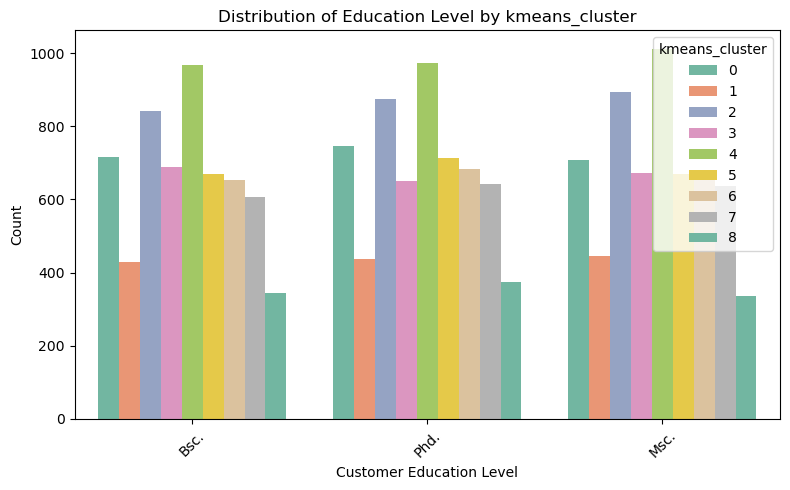

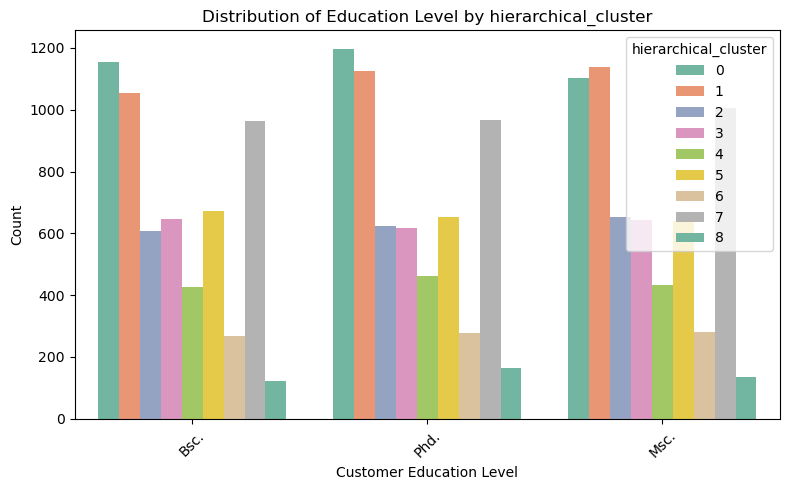

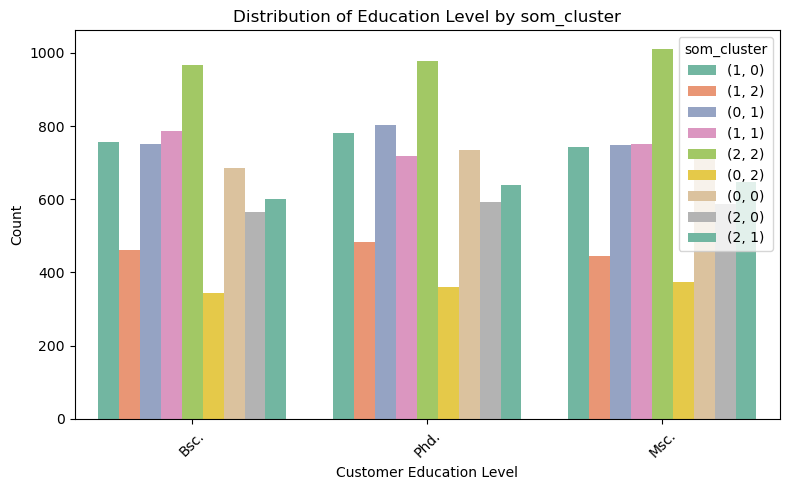

In [15]:
for cluster_col in ['kmeans_cluster', 'hierarchical_cluster', 'som_cluster']:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=data, x='customer_educlevel', hue=cluster_col, palette='Set2')
    plt.title(f'Distribution of Education Level by {cluster_col}')
    plt.xticks(rotation=45)
    plt.xlabel("Customer Education Level")
    plt.ylabel("Count")
    plt.legend(title=cluster_col)
    plt.tight_layout()
    plt.show()
